In [32]:
#Importing the necessary liberies
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/khamaleshramesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/khamaleshramesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/khamaleshramesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
#Reading the file
file_path = '/Users/khamaleshramesh/Downloads/ML Project/DisneylandReviews.csv'

data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [36]:
data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [40]:
data.describe()

,Review_ID,Rating
count,4.265600e+04,42656.000000
mean,3.188553e+08,4.217695
std,1.657092e+08,1.063371
min,1.398724e+06,1.000000
25%,1.743274e+08,4.000000
50%,2.907583e+08,5.000000
75%,4.489579e+08,5.000000
max,6.708014e+08,5.000000


In [42]:
null_values = data.isnull().sum()
duplicates = data.duplicated().sum()

In [44]:
null_values

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [46]:
duplicates

12

In [48]:
#Removing the duplicates
data_cleaned = data.drop_duplicates()

In [50]:
data_cleaned.shape

(42644, 6)

In [52]:
data_cleaned

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


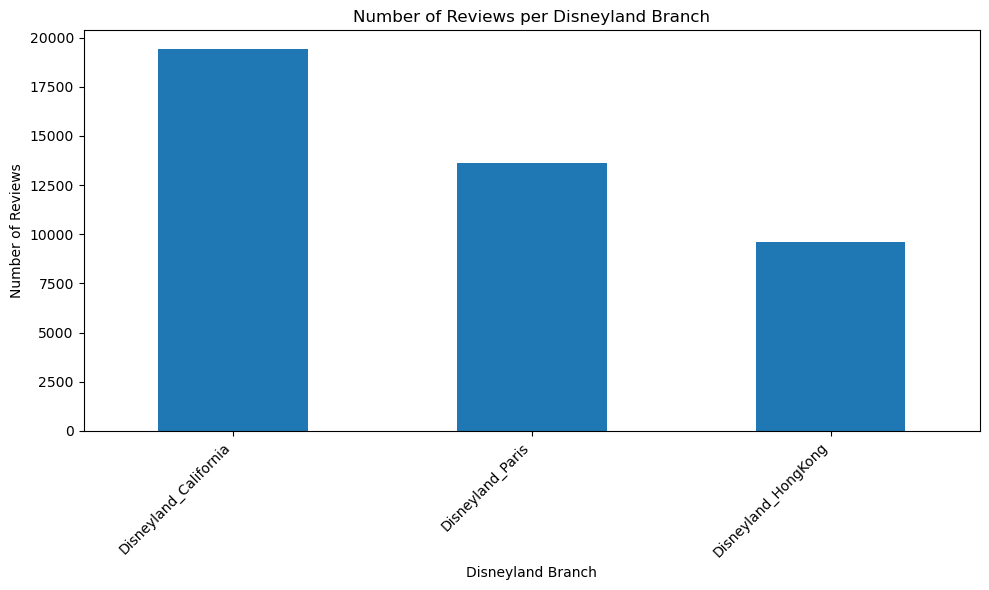

In [54]:
#Plots for better understanding
branch_review_counts = data_cleaned['Branch'].value_counts()


plt.figure(figsize=(10, 6))
branch_review_counts.plot(kind='bar')
plt.title('Number of Reviews per Disneyland Branch')
plt.xlabel('Disneyland Branch')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
#Using REGEX method
def preprocess_with_nltk(text):

    text = re.sub(r'[^A-Za-z\s]', '', text) 
    text = text.lower()  
    text = re.sub(r'\s+', ' ', text).strip()

    words = word_tokenize(text) 

    stop_words = stopwords.words('english') 
    filtered_words = [] 
    for word in words:  
        if word not in stop_words: 
            filtered_words.append(word) 

    lemmatizer = WordNetLemmatizer() 
    lemmatized_words = [] 
    for word in filtered_words: 
        lemmatized_words.append(lemmatizer.lemmatize(word)) 

 
    final_text = ' '.join(lemmatized_words) 

    return final_text 

In [58]:
data_cleaned.loc[:, 'Cleaned_Text'] = data_cleaned['Review_Text'].apply(preprocess_with_nltk)
data_cleaned.head(10)

/var/folders/9x/hj_r82p978jcb1s_7g5lhh_w0000gn/T/ipykernel_24733/1750114593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[:, 'Cleaned_Text'] = data_cleaned['Review_Text'].apply(preprocess_with_nltk)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Cleaned_Text
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,youve ever disneyland anywhere youll find disn...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,since last time visit hk disneyland yet time s...
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,thanks god hot humid visiting park otherwise w...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,hk disneyland great compact park unfortunately...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,location city took around hour kowlon kid like...
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong,disney world disneyland anaheim tokyo disneyla...
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong,great place day go wont even know obviously we...
7,670574142,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong,think intro disney magic little one almost att...
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong,feel let placethe disneyland train fantastic g...
9,670570869,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong,go talking disneyland whatever say le disneyla...


In [60]:
#Test and Train split
X = data_cleaned['Cleaned_Text']  
y = data_cleaned['Branch']      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
#Vectorizer method
vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [63]:
#Logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_bow, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [66]:
#Performance metrics
y_pred = model.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8498065423848048


In [68]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                        precision    recall  f1-score   support

Disneyland_California       0.86      0.89      0.87      3881
  Disneyland_HongKong       0.84      0.80      0.82      1922
     Disneyland_Paris       0.84      0.82      0.83      2726

             accuracy                           0.85      8529
            macro avg       0.85      0.84      0.84      8529
         weighted avg       0.85      0.85      0.85      8529

